# INSTRM-2047

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



import psycopg2
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker


# Insert into fiducial_fiber_calib

In [6]:
pd.to_datetime('2022-09-16 00:00:00.0000')

Timestamp('2022-09-16 00:00:00')

In [14]:
# Create a sample DataFrame
data = {'fiducial_fiber_calib_id': 13,
       'calibrated_at': '2022-09-16 00:00:00.0000',
       'comments': 'transformed using AG'}
df = pd.DataFrame([data])

print(df)

   fiducial_fiber_calib_id             calibrated_at              comments
0                       13  2022-09-16 00:00:00.0000  transformed using AG


In [11]:
data

{'fiducial_fiber_calib_id': 13, 'calibrated_at': '2022-09-16 00:00:00.0000'}

In [17]:
conn = psycopg2.connect("dbname='opdb' host='db-ics' port=5432 user='pfs'") 
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

Session = sessionmaker(bind=engine)
session = Session()

df.to_sql('fiducial_fiber_calib', con=engine, index=False, if_exists='append')

session.close()

# Insert into fiducial_fiber_geometry

In [55]:
old = pd.read_csv('/software/devel/chyan/pfs_instdata/data/pfi/fiducial_positions_20210524.csv',sep=',',header=9)
df = pd.read_csv('/software/devel/chyan/pfs_instdata/data/pfi/fiducial_positions_20220916c.csv',sep=',',header=12)

In [56]:
new_column_names = {'fiducialId': 'fiducial_fiber_id',
                    'x_mm': 'ff_center_on_pfi_x_mm',
                    'y_mm': 'ff_center_on_pfi_y_mm'}

df.rename(columns=new_column_names, inplace=True)
df['ambient_temp']=20
df['elevation']=90
df['fiducial_fiber_calib_id']=13

In [57]:
conn = psycopg2.connect("dbname='opdb' host='db-ics' port=5432 user='pfs'") 
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

Session = sessionmaker(bind=engine)
session = Session()

df.to_sql('fiducial_fiber_geometry', con=engine, index=False, if_exists='append')

session.close()

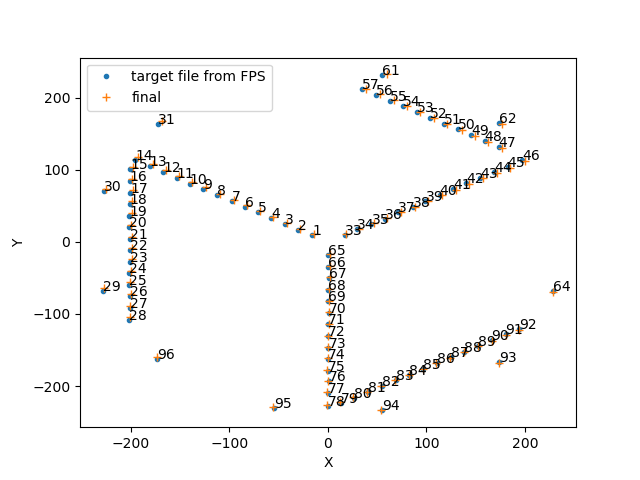

In [43]:
%matplotlib widget
#plt.plot(cobra_target.real,cobra_target.imag,'.',label='target file from DB')
plt.plot(df['ff_center_on_pfi_x_mm'],df['ff_center_on_pfi_y_mm'],'.',label='target file from FPS')
for x, y, s in zip(df['ff_center_on_pfi_x_mm'],df['ff_center_on_pfi_y_mm'],df['fiducialId']):
    plt.text(x,y,s)

plt.plot(old['x_mm'],old['y_mm'],'+',label='final')
#plt.plot(nomial.real,nomial.imag,'+',label='nomial')
#plt.plot(match['pfi_center_x_mm'].values,match['pfi_center_y_mm'].values,'x',label='cobra')
#plt.title(f'{runDir} {pfsVisit}',)
plt.xlabel('X')
plt.ylabel('Y')

#plt.xlim(-18.49,-19.48)
#plt.ylim(-5.014,-6.002)

plt.legend()
plt.show()

In [36]:
calibid= 1

In [37]:
conn = psycopg2.connect("dbname='opdb' host='db-ics' port=5432 user='pfs'") 
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

with conn:
    fiberData = pd.read_sql(f'''
        SELECT DISTINCT 
            *
        FROM 
            fiducial_fiber_geometry
        WHERE
            fiducial_fiber_geometry.fiducial_fiber_calib_id = %(calibid)s
        -- limit 10
    ''', engine, params={'calibid': calibid})


In [38]:
fiberData

fiducial_fiber_id  ff_center_on_pfi_x_mm  ff_center_on_pfi_y_mm  \
0                  42             143.011993              80.052002   
1                  78              40.070999            -207.783005   
2                  35              46.270001              25.587000   
3                  67               1.208000             -97.328003   
4                  51             121.140999             163.585999   
..                ...                    ...                    ...   
88                 62               1.912000             -17.176001   
89                 32             -49.723999             233.500000   
90                 66               0.928000             -81.431999   
91                 34              31.610001              17.937000   
92                 86             151.800995            -145.035004   

    ambient_temp  elevation  fiducial_fiber_calib_id  
0            0.0       90.0                        1  
1            0.0       90.0                        1  
2            0.0       90.0                        1  
3            0.0       90.0                        1  
4            0.0       90.0                        1  
..           ...        ...                      ...  
88           0.0       90.0                        1  
89           0.0       90.0                        1  
90           0.0       90.0                        1  
91           0.0       90.0                        1  
92           0.0       90.0                        1  

[93 rows x 6 columns]

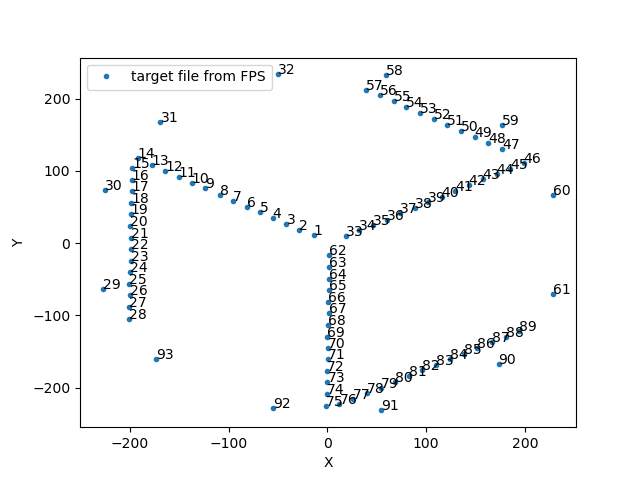

In [44]:
%matplotlib widget
#plt.plot(cobra_target.real,cobra_target.imag,'.',label='target file from DB')
plt.plot(fiberData['ff_center_on_pfi_x_mm'],fiberData['ff_center_on_pfi_y_mm'],'.',label='target file from FPS')
for x, y, s in zip(fiberData['ff_center_on_pfi_x_mm'],fiberData['ff_center_on_pfi_y_mm'],fiberData['fiducial_fiber_id']):
    plt.text(x,y,s)

plt.xlabel('X')
plt.ylabel('Y')
#plt.xlim(-18.49,-19.48)
#plt.ylim(-5.014,-6.002)

plt.legend()
plt.show()

In [45]:
from pfs.utils import butler 

In [46]:
fids = butler.Butler().get('fiducials')

In [47]:
fids

fiducialId     x_mm     y_mm
0            1  -15.708    9.984
1            2  -30.484   17.075
2            3  -43.553   24.875
3            4  -57.533   33.424
4            5  -70.963   40.931
..         ...      ...      ...
86          92  193.532 -120.393
87          93  173.538 -166.871
88          94   55.128 -233.751
89          95  -54.393 -230.304
90          96 -173.315 -163.058

[91 rows x 3 columns]

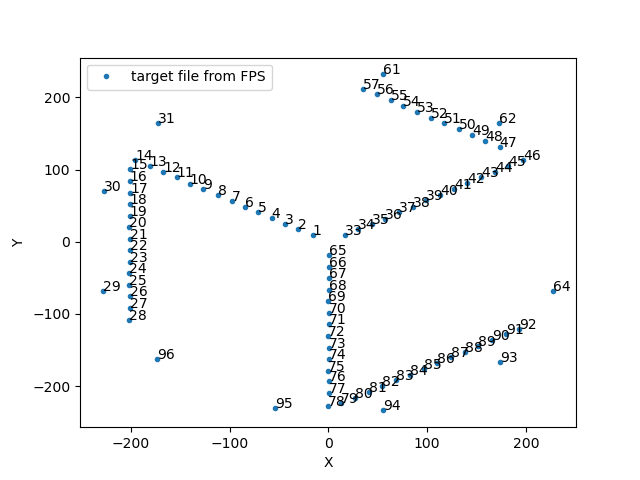

In [49]:
%matplotlib widget
#plt.plot(cobra_target.real,cobra_target.imag,'.',label='target file from DB')
plt.plot(fids['x_mm'],fids['y_mm'],'.',label='target file from FPS')
for x, y, s in zip(fids['x_mm'],fids['y_mm'],fids['fiducialId']):
    plt.text(x,y,s)

plt.xlabel('X')
plt.ylabel('Y')
#plt.xlim(-18.49,-19.48)
#plt.ylim(-5.014,-6.002)

plt.legend()
plt.show()